In [1]:
import numpy as np
import os
import pandas as pd

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt 
import seaborn as sns

#attributes/features
* buying - price of the car: vhigh, high, med, low
* maint - price of maintenance: vhigh, high, med, low
* doors - number of doors: 2, 3, 4, 5more
* persons - highest number of passengers that can be transported: 2, 4, more
* lug_boot - size of luggage compartment/boot: small, med, big
* safety - estimated safety of car: low, med, high
#label - car acceptibility:bad, acc

# Load Data

In [21]:
training_data = pd.read_csv("training_data.csv")
training_data

,cid,buying,maint,doors,persons,lug_boot,safety,label
0,0,vhigh,med,2,4,med,med,bad
1,1,low,med,3,4,small,high,acc
2,2,med,med,3,more,med,high,acc
3,3,med,low,4,2,big,med,bad
4,4,low,high,4,more,big,high,acc
...,...,...,...,...,...,...,...,...
295,295,vhigh,low,3,2,small,med,bad
296,296,vhigh,vhigh,5more,4,small,low,bad
297,297,med,vhigh,3,4,med,high,acc
298,298,high,high,4,4,med,high,acc


In [22]:
training_data = training_data.drop(['cid'],axis=1)
training_data.describe()
#training_data

,buying,maint,doors,persons,lug_boot,safety,label
count,300,300,300,300,300,300,300
unique,4,4,4,3,3,3,2
top,low,low,2,more,big,high,bad
freq,115,92,85,114,113,131,150


In [4]:
training_data.label.value_counts()

label
bad    150
acc    150
Name: count, dtype: int64

# Data Preprocessing

In [ ]:
# 將資料分成 feature（X）：拿來輸入模型 和標籤（y）：拿來訓練正確答案
y = training_data['label']
X = training_data.drop(['label'],axis=1)

In [ ]:
# 把 X 中所有類別型變數（categorical features）轉成 One-Hot Encoding
# get dummy：把類別型資料（例如：文字型態）轉換成數值型態的 One-Hot Encoding
# drop_first=True 代表避免虛擬變數陷阱 (Dummy Variable Trap)，少掉一個欄位，避免特徵完全線性依賴
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded

,buying_low,buying_med,buying_vhigh,maint_low,maint_med,maint_vhigh,doors_3,doors_4,doors_5more,persons_4,persons_more,lug_boot_med,lug_boot_small,safety_low,safety_med
0,False,False,True,False,True,False,False,False,False,True,False,True,False,False,True
1,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False
2,False,True,False,False,True,False,True,False,False,False,True,True,False,False,False
3,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True
4,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,False,False,True,True,False,False,True,False,False,False,False,False,True,False,True
296,False,False,True,False,False,True,False,False,True,True,False,False,True,True,False
297,False,True,False,False,False,True,True,False,False,True,False,True,False,False,False
298,False,False,False,False,False,False,False,True,False,True,False,True,False,False,False


In [7]:
# test_size
#If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. 
#If int, represents the absolute number of test samples.

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 24)

In [8]:
X_train.shape, X_test.shape

((240, 15), (60, 15))

In [9]:
dt = tree.DecisionTreeClassifier(criterion='gini')
dt.fit(X_train, y_train)
print(f"# of leaf nodes: {dt.get_n_leaves()}")
print(f"Max depth: {dt.get_depth()}")

# of leaf nodes: 30
Max depth: 9


In [10]:
# print the scores on training and test set

print('Training set - Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set - Accuracy: {:.4f}'.format(dt.score(X_test, y_test)))

Training set - Accuracy: 1.0000
Test set - Accuracy: 0.9667


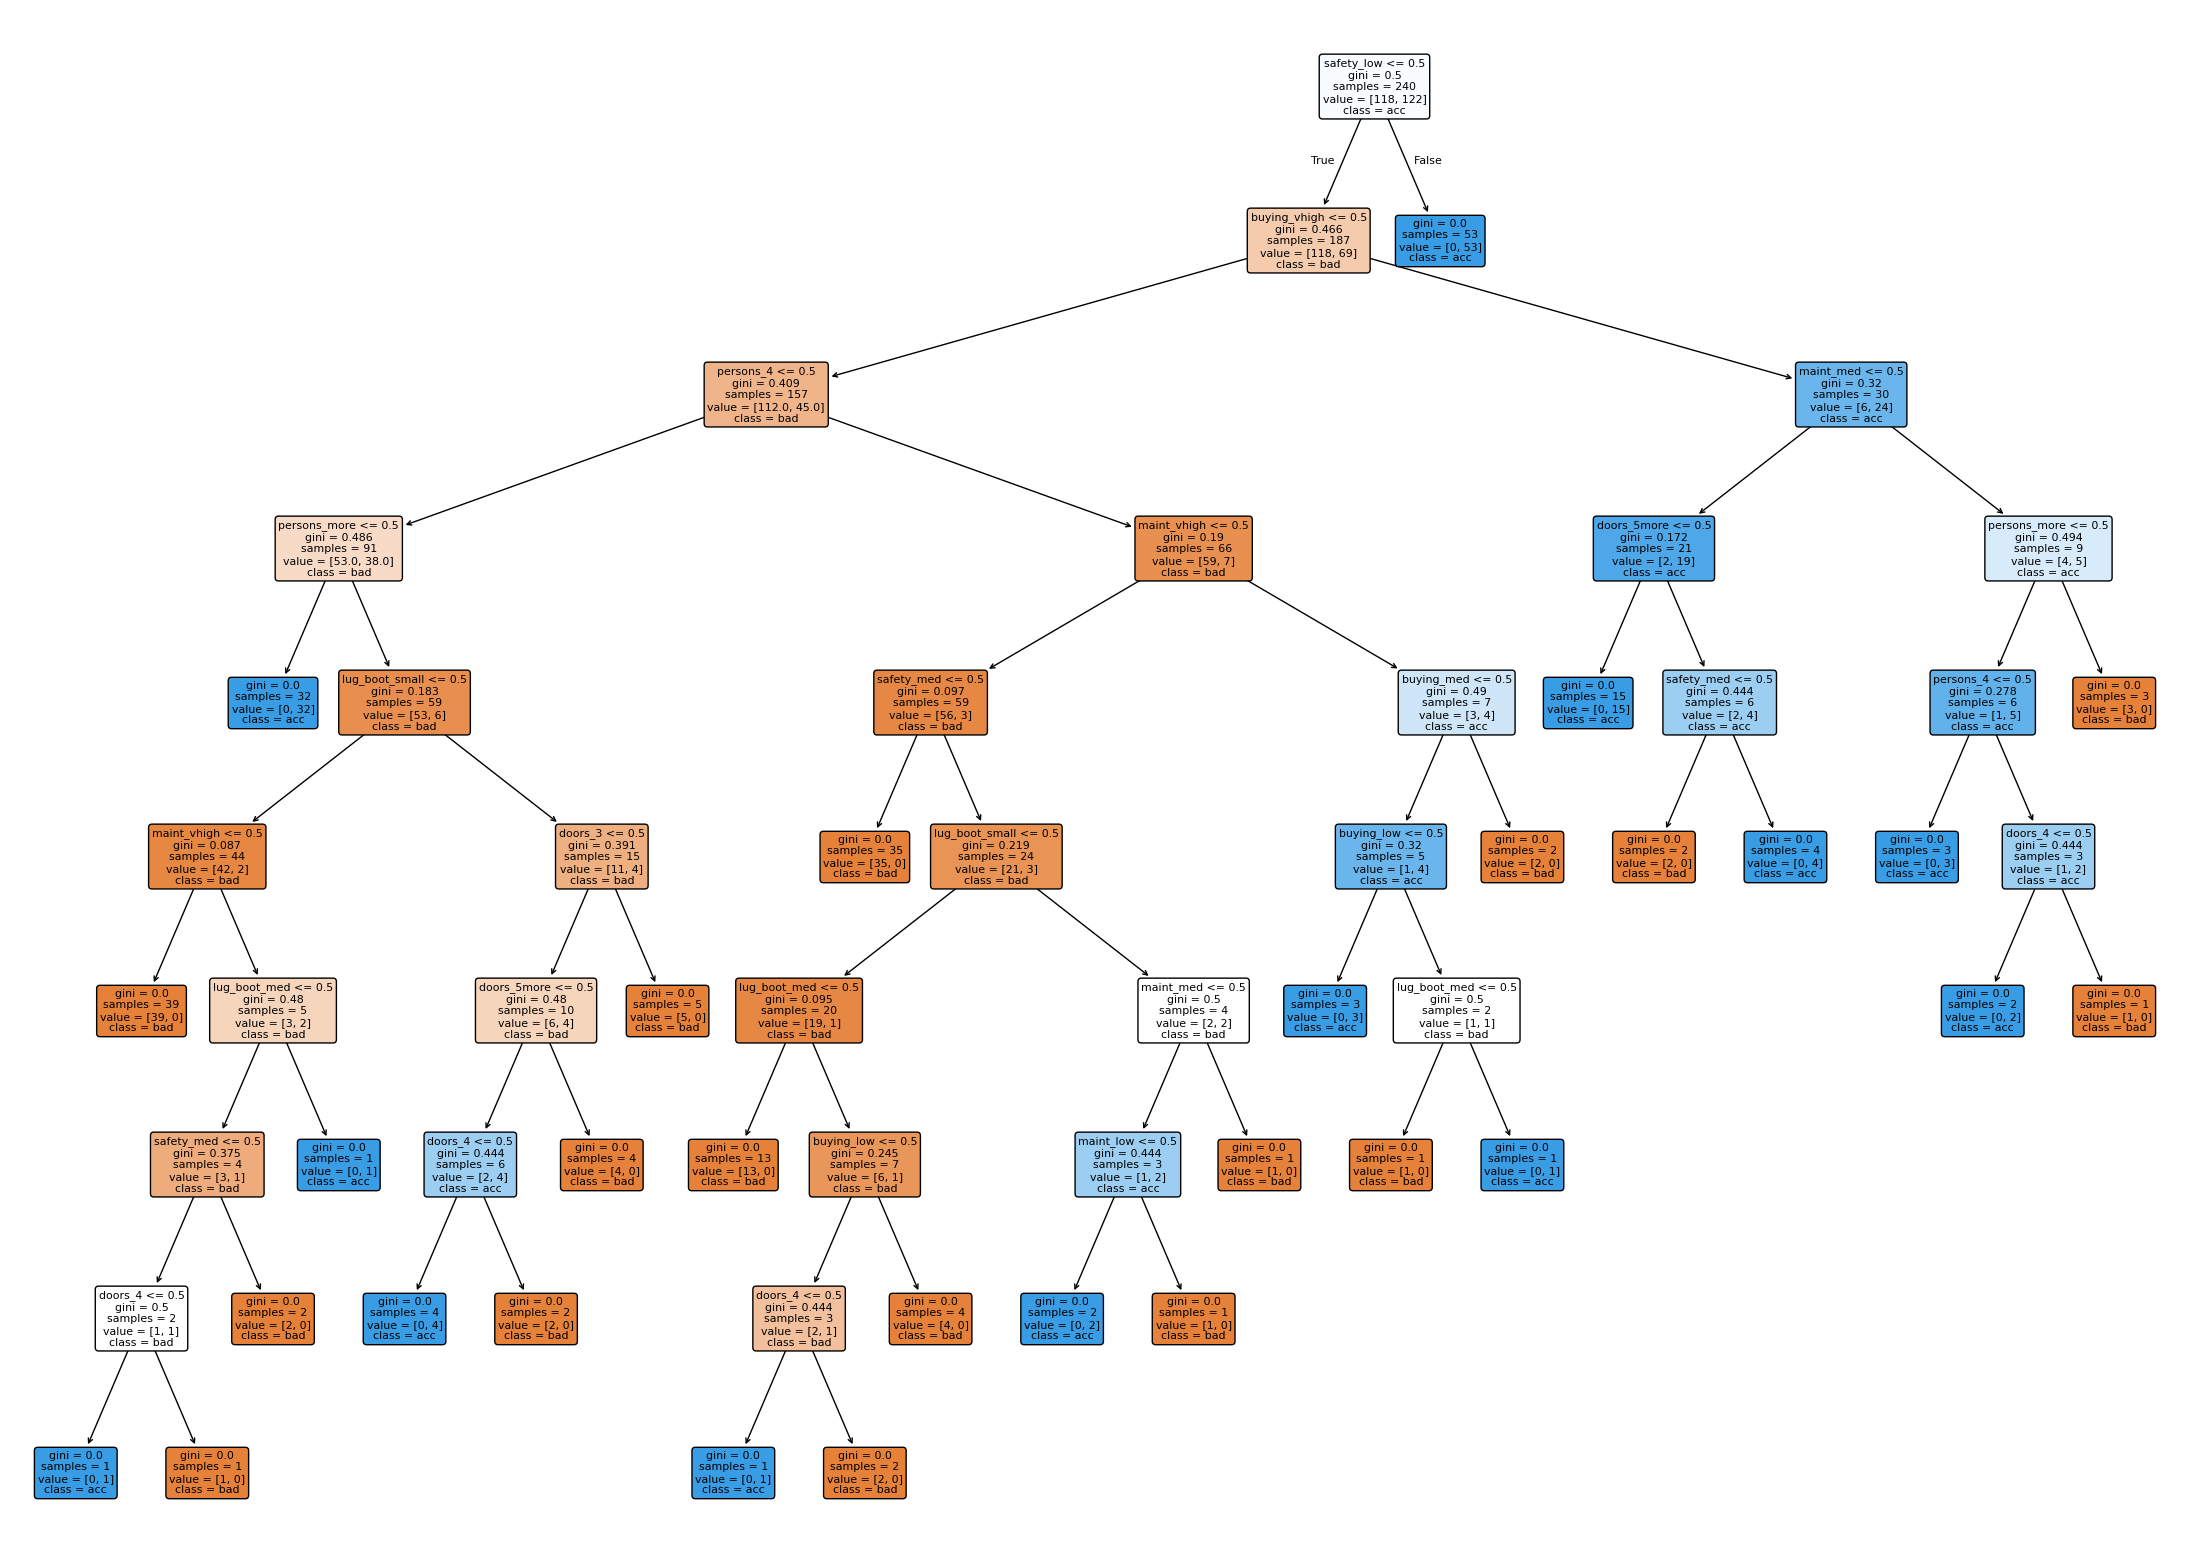

In [11]:
plt.figure(figsize=(28,20))
tree.plot_tree(dt.fit(X_train, y_train), 
               feature_names=X_encoded.columns,
               class_names=["bad","acc"],
               filled=True,
               rounded=True) 
plt.show()

### 第二題

In [ ]:
dt_entropy = tree.DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_encoded, y)

print("Max Depth:", dt_entropy.get_depth())
print("Leaf Nodes:", dt_entropy.get_n_leaves())

Max Depth: 10
Leaf Nodes: 37


### 第三題

In [24]:
# 使用 Holdout 策略分割資料：70% 訓練集 (210 筆) 與 30% 測試集
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [25]:
# 使用 Entropy 作為 Impurity Metric 建立 fully-grown 的 Decision Tree
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X_train, y_train)

# 列出決策樹的最大深度及葉節點數
print("Max Depth:", dt_entropy.get_depth())
print("Leaf Nodes:", dt_entropy.get_n_leaves())

Max Depth: 9
Leaf Nodes: 28


In [29]:
n_nodes = dt_entropy.tree_.node_count
features = dt_entropy.tree_.feature      # 每個 node 對應的特徵索引，leaf node 的值為 -2
thresholds = dt_entropy.tree_.threshold    # 每個 node 的分割門檻

internal_nodes = []
for i in range(n_nodes):
    if features[i] != -2:  # leaf node 的特徵索引為 -2
        feat_name = X_encoded.columns[features[i]]
        internal_nodes.append((i, feat_name, thresholds[i]))

# 依照 Node Index 升冪排序 (預設順序即為自然順序，此處仍顯式排序)
internal_nodes.sort(key=lambda x: x[0])

# 表頭
print("Internal Nodes (Sorted by Node Index):")
print("{:<12} {:<20} {:<15}".format("Node Index", "Attribute", "Split Threshold"))
for node in internal_nodes:
    print("{:<12} {:<20} {:.4f}".format(node[0], node[1], node[2]))

Internal Nodes (Sorted by Node Index):
Node Index   Attribute            Split Threshold
0            safety_low           0.5000
1            buying_vhigh         0.5000
2            maint_vhigh          0.5000
3            persons_4            0.5000
4            persons_more         0.5000
6            lug_boot_small       0.5000
8            doors_3              0.5000
9            doors_5more          0.5000
10           doors_4              0.5000
15           safety_med           0.5000
17           lug_boot_small       0.5000
18           lug_boot_med         0.5000
20           doors_4              0.5000
21           buying_low           0.5000
25           doors_4              0.5000
26           doors_3              0.5000
30           doors_3              0.5000
31           persons_more         0.5000
33           buying_low           0.5000
35           lug_boot_med         0.5000
38           lug_boot_med         0.5000
39           buying_med           0.5000
41       

### 第四題

In [30]:
# print the scores on training and test set

print('Training set - Accuracy: {:.4f}'.format(dt.score(X_train, y_train)))
print('Test set - Accuracy: {:.4f}'.format(dt.score(X_test, y_test)))

Training set - Accuracy: 0.9905
Test set - Accuracy: 0.9889


In [31]:
# 計算使用訓練集 210 筆資料的錯誤率與測試集 90 筆資料的錯誤率

train_accuracy = dt_entropy.score(X_train, y_train)
test_accuracy = dt_entropy.score(X_test, y_test)

train_error = 1 - train_accuracy
test_error = 1 - test_accuracy

print("Training Error: {:.4f}".format(train_error))
print("Test Error: {:.4f}".format(test_error))

Training Error: 0.0000
Test Error: 0.0889


### 第五題

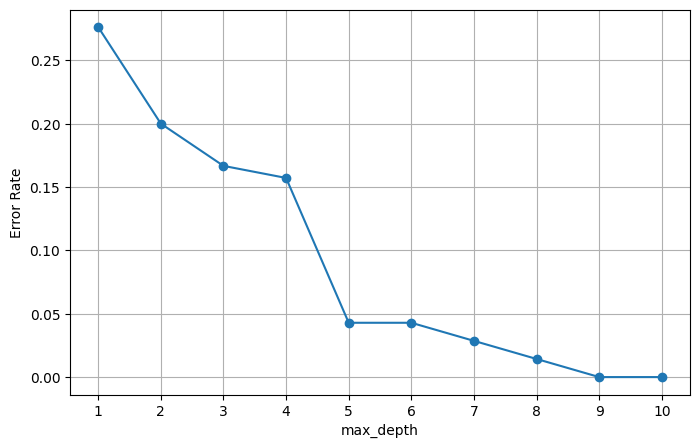

In [35]:
max_depth_list = list(range(1, 11))
training_errors = []

for depth in max_depth_list:
    dt_model = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    dt_model.fit(X_train, y_train)
    train_acc = dt_model.score(X_train, y_train)
    train_error = 1 - train_acc
    training_errors.append(train_error)

plt.figure(figsize=(8, 5))
plt.plot(max_depth_list, training_errors, marker='o')
plt.xlabel("max_depth")
plt.ylabel("Error Rate")
plt.xticks(max_depth_list)
plt.grid(True)
plt.show()

### 第六題

In [66]:
from sklearn.model_selection import GridSearchCV, KFold
import numpy as np

# 設定欲搜尋的參數範圍
param_grid = {'max_depth': list(range(1, 11))}

# 外層 (5-fold) 與內層 (5-fold) 的交叉驗證
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

outer_scores = []  # 記錄每個外層折的測試集準確率
best_depths = []   # 記錄每個外層折選出的最佳 max_depth

for train_idx, test_idx in outer_cv.split(X_encoded, y):
    X_train_outer, X_test_outer = X_encoded.iloc[train_idx], X_encoded.iloc[test_idx]
    y_train_outer, y_test_outer = y.iloc[train_idx], y.iloc[test_idx]
    
    # 內層交叉驗證搜尋最佳參數
    grid = GridSearchCV(DecisionTreeClassifier(criterion="entropy"),
                        param_grid,
                        cv=inner_cv,
                        scoring='accuracy')
    grid.fit(X_train_outer, y_train_outer)
    
    best_depth = grid.best_params_['max_depth']
    best_depths.append(best_depth)
    
    # 用外層測試集評估此輪最佳模型
    test_acc = grid.score(X_test_outer, y_test_outer)
    outer_scores.append(test_acc)
    
    print("Outer fold best max_depth: {}, Test Accuracy: {:.4f}".format(best_depth, test_acc))

# 評估總體的外部驗證結果與最佳 max_depth
mean_accuracy = np.mean(outer_scores)
from collections import Counter
most_common_depth = Counter(best_depths).most_common(1)[0][0]

print("\nOverall Outer CV Accuracy: {:.4f}".format(mean_accuracy))
print("建議的 max_depth (取各外部折中出現最多次者):", most_common_depth)

Outer fold best max_depth: 7, Test Accuracy: 0.9000
Outer fold best max_depth: 5, Test Accuracy: 0.9000
Outer fold best max_depth: 8, Test Accuracy: 0.9500
Outer fold best max_depth: 7, Test Accuracy: 0.9167
Outer fold best max_depth: 5, Test Accuracy: 0.9000

Overall Outer CV Accuracy: 0.9133
建議的 max_depth (取各外部折中出現最多次者): 7


### 第七題

In [ ]:
dt_selected = DecisionTreeClassifier(criterion="entropy", max_depth=7)
dt_selected.fit(X_train, y_train)

# 計算 Leaf Nodes 總數
leaf_nodes = dt_selected.get_n_leaves()

# 訓練錯誤率 (Training Error)
train_accuracy = dt_selected.score(X_train, y_train)
train_error = 1 - train_accuracy

# 測試錯誤率 (Test Error)
test_accuracy = dt_selected.score(X_test, y_test)
test_error = 1 - test_accuracy

print("Leaf Nodes: {}".format(leaf_nodes))
print("Training Error: {:.4f}".format(train_error))
print("Test Error: {:.4f}".format(test_error))

Leaf Nodes: 24
Training Error: 0.0167
Test Error: 0.0222


### 第八題

Max Depth: 10
Leaf Nodes: 37


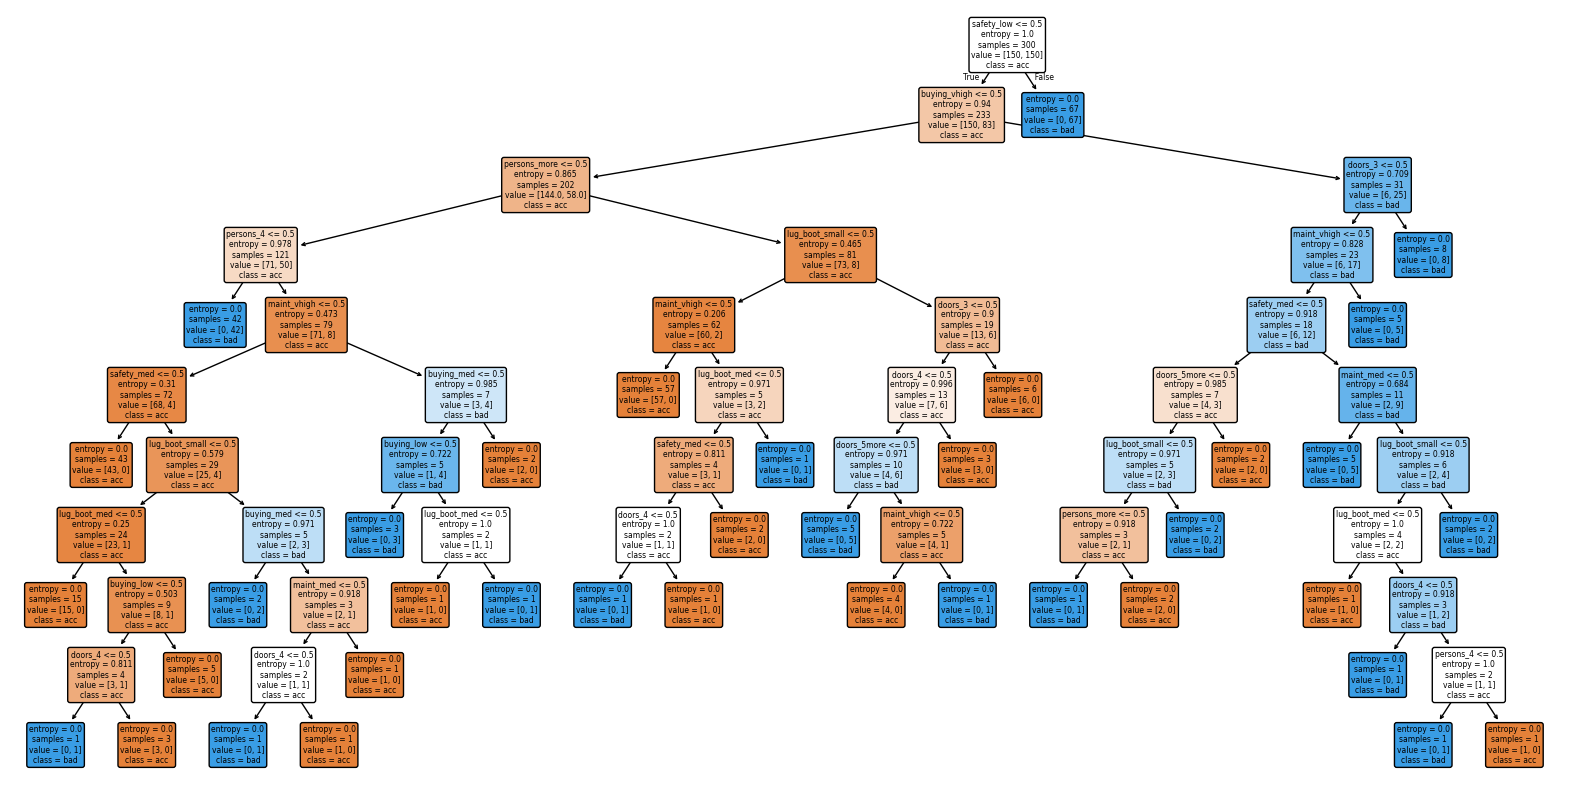

In [ ]:
# Max Depth
max_depth = dt.get_depth()

# Leaf Nodes 總數
n_leaves = dt.get_n_leaves()

print(f"Max Depth: {max_depth}")
print(f"Leaf Nodes: {n_leaves}")

# Decision Tree 視覺化
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X_train_encoded.columns, class_names=dt.classes_, filled=True, rounded=True)
plt.show()

test_data = pd.read_csv('P3_test.csv')

# 測試資料也要同樣的前處理
X_test = test_data.drop(['cid'], axis=1)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# 保證測試資料的欄位順序跟訓練資料一樣
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

y_pred = dt.predict(X_test_encoded)

# 產生 submission.csv
submission = pd.DataFrame({
    'cid': test_data['cid'],
    'label': y_pred
})
submission.to_csv('submission.csv', index=False)